# 📝 Exercise M4.02

The goal of this exercise is to build an **intuition on** what will be the
parameters' values of a linear model when the **link between the data and the
target** is **non-linear**.

First, we will generate such non-linear data.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"><tt class="docutils literal">np.random.RandomState</tt> allows to create a <strong> random number generator </strong> which can
be later used to get deterministic results.</p>
</div>

In [1]:
import numpy as np
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2  # Uniform random distributed x
noise = rng.randn(n_sample) * .3  # Random noise on y
target = data ** 3 - 0.5 * data ** 2 + noise  # Non-linear link bwn x and y plus noise

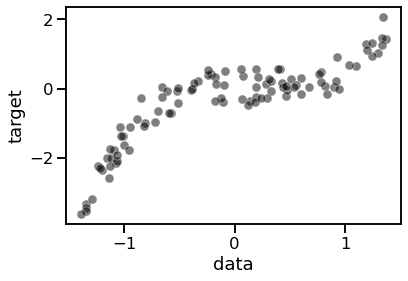

In [2]:
import pandas as pd
import seaborn as sns

full_data = pd.DataFrame({"data": data, "target": target})
_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

We observe that the **link** between the data `data` and vector `target` is
**non-linear**. For instance, `data` could represent to be the years of
experience (normalized) and `target` the salary (normalized). Therefore, the
problem here would be to infer the salary given the years of experience.

Using the function `f` defined below, find both the `weight` and the
`intercept` that you think will lead to a good linear model. Plot both the
data and the predictions of this model. Compute the mean squared error as
well.

In [3]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data + intercept
    return target_predict

Text(0.5, 1.0, 'Manual model fit')

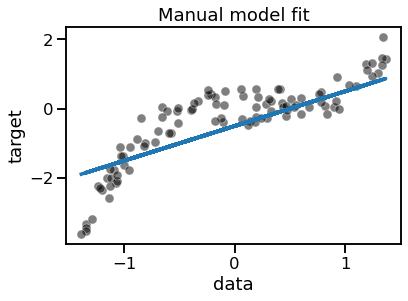

In [36]:
# Write your code here.: plot both the data and the model predictions
intercept, weight= .5, 1.
full_data['target_pred'] = f(data, weight=1., intercept=-.5)
ax = sns.scatterplot(data=full_data, x='data', y='target', color='black', alpha=.5)
ax.plot(full_data['data'], full_data['target_pred'])
ax.set_title("Manual model fit")

In [33]:
# Write your code here.: compute the mean squared error
residual = full_data['target_pred'] - full_data['target']
mse = (residual * residual).mean()
mse, np.sqrt(mse)

(0.4475086513223197, 0.6689608742836308)

Train a linear regression model and plot both the data and the predictions
of the model. Compute the mean squared error with this model.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, by convention <tt class="docutils literal">data</tt> (also called <tt class="docutils literal">X</tt> in the scikit-learn
documentation) should be a 2D matrix of shape <tt class="docutils literal">(n_samples, n_features)</tt>.
If <tt class="docutils literal">data</tt> is a 1D vector, you need to reshape it into a matrix with a
single column if the vector represents a feature or a single row if the
vector represents a sample.</p>
</div>

In [27]:
from sklearn.linear_model import LinearRegression

# Write your code here.: fit a linear regression
model = LinearRegression()
model.fit(full_data['data'].to_numpy().reshape(-1, 1), full_data['target'])
print(model.intercept_, model.coef_)

-0.28930457228258805 [1.24617601]


Text(0.5, 1.0, 'Sklearn model fit')

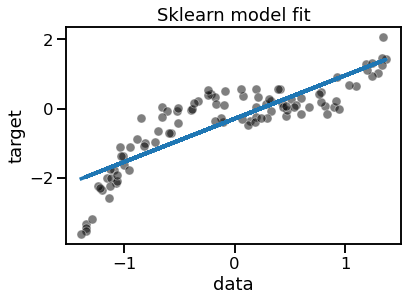

In [34]:
# Write your code here.: plot the data and the prediction of the linear
# regression model
full_data['model_target_pred'] = model.intercept_ + model.coef_ * full_data['data']
ax = sns.scatterplot(data=full_data, x='data', y='target', color='black', alpha=0.5)
ax.plot(full_data['data'], full_data['model_target_pred'])
ax.set_title("Sklearn model fit")

In [32]:
# Write your code here.: compute the mean squared error
res = full_data['model_target_pred'] - full_data['target']
mse = (res * res).mean()
mse, np.sqrt(mse)

(0.3711754400250842, 0.6092416926188523)